# LDA Mallet Implementation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
SO_tag_filtered_nocode = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/clean_compl_data4.csv")
SO_tag_filtered_nocode.head()

Unnamed: 0  ... label
0  0           ...  1   
1  1           ...  0   
2  2           ...  1   
3  3           ...  1   
4  4           ...  0   

[5 rows x 3 columns]

In [ ]:
#checkpoint
#save csv with limited columns
SO_tag_filtered_nocode['Id'] = SO_tag_filtered_nocode.index
SO_tag_filtered_nocode.to_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_text_processed.csv", columns=['Id','text'],index=False)

In [ ]:
SO_tag_filtered_nocode = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_text_processed.csv")
SO_tag_filtered_nocode.head()

Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text
0  0   zoom piano roll zoom piano roll would useful                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1  1   buggy behavior selection screenshot http cloud git hub user content png                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# dataset visualizations

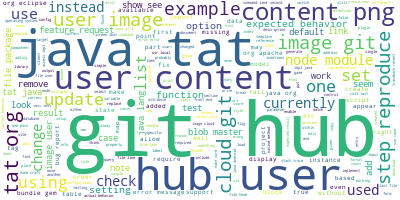

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(SO_tag_filtered_nocode['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

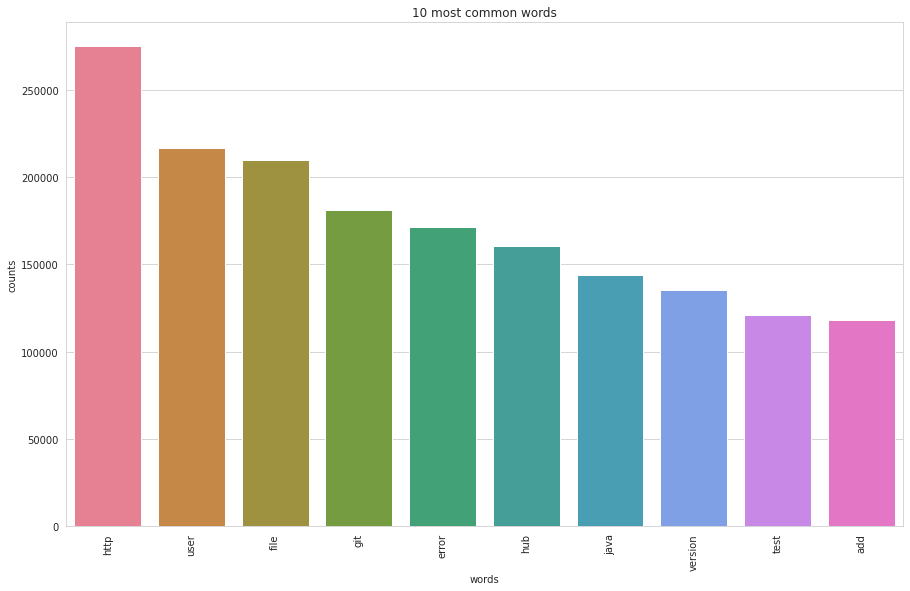

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(SO_tag_filtered_nocode['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# sklearn default implementation of LDA Mallet

In [ ]:
#benchmark - no need to run
# the sklearn default implementation of LDAMallet
%%time

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, verbose = True)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Topics found via LDA:

Topic #0:
java tat org method com exception event service impl core

Topic #1:
file add use data time need like make code support

Topic #2:
user page add view field new button issue item list

Topic #3:
http git hub user image content com png module cloud

Topic #4:
error file test line version server log run package build
CPU times: user 52.9 s, sys: 5.95 s, total: 58.9 s
Wall time: 1h 3min 59s


# Generating bi-grams and tri-grams

In [ ]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data_words = list(sent_to_words(SO_tag_filtered_nocode.text))

print(data_words[:1])

[['zoom', 'piano', 'roll', 'zoom', 'piano', 'roll', 'would', 'useful']]


In [ ]:
#checkpoint 

import pickle
#pickle.dump(data_words,'/content/drive/MyDrive/Research/ICSME 2021/SO_data_words.pkl')

#saving data words
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_words.pkl', 'wb') as handle:
    pickle.dump(data_words, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!pip install pyLDAvis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#opening saved data words.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_words.pkl', 'rb') as handle:
    data_words = pickle.load(handle)
# data_words

In [ ]:
import pyLDAvis
# import pyLDAvis.gensim_models
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

bigram = gensim.models.Phrases(data_words, min_count=20, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# checkpoint
bigram_mod.save('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_bigram_mod')
trigram_mod.save('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_trigram_mod')

In [ ]:
# LOAD
bigram_mod = gensim.models.phrases.Phraser.load('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_bigram_mod')
trigram_mod = gensim.models.phrases.Phraser.load('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_trigram_mod')

# lemmetization

In [ ]:
# stopwords
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']
import re

data_processed = []
stop_words = nltk.corpus.stopwords.words('english')

# bi-gram and tri-gram implementation
texts = [bigram_mod[doc] for doc in data_words]
texts = [trigram_mod[bigram_mod[doc]] for doc in data_words]

texts_out = []
# implement lemmatization and filter out unwanted part of speech tags
for sent in texts:
  doc = nlp(" ".join(sent)) 
  texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
# remove stopwords and short tokens again after lemmatization
texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out] 

data_ready = texts_out
data_ready

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

[['would', 'useful'],
 ['behavior', 'selection', 'screenshot', 'content'],
 ['auto',
  'update',
  'feature',
  'great',
  'job',
  'far',
  'auto',
  'update',
  'feature',
  'would',
  'nice',
  'alternatively',
  'menu',
  'button',
  'check',
  'late',
  'version',
  'manually'],
 ['think', 'stop', 'log', 'request', 'health', 'gtg'],
 ['enable',
  'alarm',
  'action',
  'expect',
  'behavior',
  'alarm',
  'action',
  'disable',
  'hardware',
  'platform',
  'may',
  'also',
  'affect',
  'actual',
  'behavior',
  'state',
  'change',
  'alarm',
  'activate',
  'step',
  'reproduce',
  'problem',
  'alarm',
  'handler',
  'work',
  'control',
  'button',
  'flag',
  'set',
  'control',
  'case',
  'handle',
  'function',
  'condition',
  'may',
  'able',
  'removed',
  'alarm',
  'handler',
  'keep',
  'generalize',
  'pid',
  'type',
  'main',
  'self',
  'alarm',
  'action',
  'alarm',
  'number',
  'ramp',
  'action',
  'alarm',
  'number',
  'ramp',
  'alarm',
  'action',
  'al

In [ ]:
# from nltk.stem import WordNetLemmatizer

# wnl = WordNetLemmatizer()
# data_processed = []
# stop_words = nltk.corpus.stopwords.words('english')
# for doc in data_words:
#     doc_out = []
#     for wd in doc:
#         if wd not in stop_words:  # remove stopwords
#             lemmatized_word = ""
#             lemmatized_word = wnl.lemmatize(wd)  # lemmatize
#             if lemmatized_word:
#                 doc_out.append(lemmatized_word)
#         else:
#             continue
#     data_processed.append(doc_out)
# data_ready = data_processed


In [ ]:
#checkpoint
#saving lemmetize
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready.pkl', 'wb') as handle:
    pickle.dump(data_ready, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready.pkl', 'rb') as handle:
    data_ready = pickle.load(handle)
# data_ready

# vocabulary

In [ ]:
# print vocab
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 69612


In [ ]:
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# checkpoint
# saving corpus
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'wb') as handle:
    pickle.dump(corpus, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'rb') as handle:
    corpus = pickle.load(handle)

In [ ]:
import pandas as pd
# creating a dictionary corpus
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq
       
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

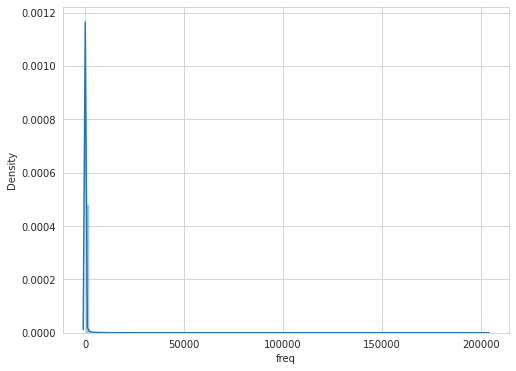

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [ ]:
dict_df.sort_values('freq', ascending=False).head(10)

freq
use      203164
file     202589
user     170907
add      150943
error    140521
http     139296
test     115019
version  113479
issue    108534
get      104260

In [ ]:
# !pip install --upgrade pip

In [ ]:
extension = dict_df[dict_df.freq>5000].index.tolist()

In [ ]:
#checkpoint
#saving extension
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_extension.pkl', 'wb') as handle:
    pickle.dump(extension, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_extension.pkl', 'rb') as handle:
    extension = pickle.load(handle)

In [ ]:
# to filter words greater then 1500 freq 
ids=[id2word.token2id[extension[i]] for i in range(len(extension))]
id2word.filter_tokens(bad_ids=ids)

# removing stopwords and outliers and frequent words to reduce vocabulary

In [ ]:
#here look for nouns, verbs .... 

import nltk
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
# add high frequency words to stop words list
stop_words.extend(extension)
wnl = WordNetLemmatizer()
data_processed = []
for doc in data_words:
    doc_out = []
    for wd in doc:
        if wd not in stop_words:  # remove stopwords
            lemmatized_word = ""
            lemmatized_word = wnl.lemmatize(wd)  # lemmatize
            if lemmatized_word:
                doc_out.append(lemmatized_word)
        else:
            continue
    data_processed.append(doc_out)
data_ready = data_processed

In [ ]:
data_ready

[['zoom', 'piano', 'roll', 'zoom', 'piano', 'roll'],
 ['buggy', 'git'],
 ['far', 'saenz', 'ramiro', 'alternatively', 'latest'],
 ['noisy', 'logging', 'health', 'gtg', 'favicon', 'ico'],
 ['pid',
  'pid',
  'alarm',
  'expected',
  'alarm',
  'pid',
  'pid',
  'hardware',
  'pid',
  'ramp',
  'oak',
  'affected',
  'pid',
  'alarm',
  'activates',
  'alarm',
  'qmc',
  'qmc',
  'handled',
  'pid',
  'pid',
  'condition',
  'removed',
  'alarm',
  'generalized',
  'pid',
  'elif',
  'alarm',
  'alarm',
  'ramp',
  'oak',
  'qmc',
  'fuji',
  'pid',
  'fuji',
  'pid',
  'fuji',
  'pid',
  'ramp',
  'oak',
  'elif',
  'pid',
  'qmc',
  'modbus',
  'pid',
  'pid',
  'pid',
  'pid',
  'elif',
  'alarm',
  'alarm',
  'ramp',
  'oak',
  'qmc',
  'fuji',
  'pid',
  'fuji',
  'pid',
  'fuji',
  'pid',
  'ramp',
  'oak',
  'elif',
  'pid',
  'qmc',
  'modbus',
  'pid',
  'pid',
  'pid',
  'pid',
  'elif',
  'alarm',
  'alarm',
  'pid',
  'qmc',
  'fuji',
  'pid',
  'fuji',
  'pid',
  'fuji',
  'p

In [ ]:
#checkpoint
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready_last.pkl', 'wb') as handle:
    pickle.dump(data_ready, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready_last.pkl', 'rb') as handle:
    data_ready = pickle.load(handle)

In [ ]:
# recreate Dictionary
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 102531


In [ ]:
# Filter out words that occur less than 10 documents, or more than
# 50% of the documents.
id2word.filter_extremes(no_below=20, no_above=0.5)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 18664


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
#checkpoint
# saving corpus
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'wb') as handle:
    pickle.dump(corpus, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'rb') as handle:
    corpus = pickle.load(handle)

# installing mallet optimizer

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-09-09 18:42:48--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  8.23MB/s    in 1.9s    

2021-09-09 18:42:51 (8.23 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

# Training the model and optimizing the number of topics 

In [ ]:
%%time
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 24.6 µs


In [ ]:
from tqdm import tqdm
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
   
   # https://stackoverflow.com/questions/32313062/what-is-the-best-way-to-obtain-the-optimal-number-of-topics-for-a-lda-model-usin

    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [ ]:
#training
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, 2, 70, 5) 

100%|██████████| 14/14 [5:58:50<00:00, 1537.88s/it]

CPU times: user 28min 56s, sys: 27.2 s, total: 29min 24s
Wall time: 5h 58min 50s


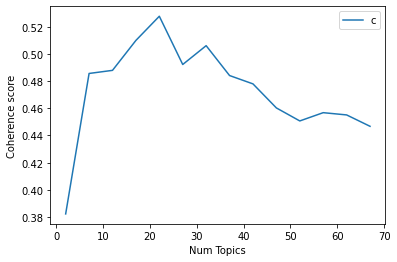

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Show graph
limit=70; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3823
Num Topics = 7  has Coherence Value of 0.4856
Num Topics = 12  has Coherence Value of 0.4879
Num Topics = 17  has Coherence Value of 0.5099
Num Topics = 22  has Coherence Value of 0.5277
Num Topics = 27  has Coherence Value of 0.4922
Num Topics = 32  has Coherence Value of 0.5061
Num Topics = 37  has Coherence Value of 0.4841
Num Topics = 42  has Coherence Value of 0.478
Num Topics = 47  has Coherence Value of 0.4603
Num Topics = 52  has Coherence Value of 0.4507
Num Topics = 57  has Coherence Value of 0.4568
Num Topics = 62  has Coherence Value of 0.4551
Num Topics = 67  has Coherence Value of 0.4468


# optimal model generation

In [ ]:
from pprint import pprint
# Select the model and print the topics
optimal_model = model_list[4] # change it if need for optimal topics
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(7,
  '0.020*"apache" + 0.019*"snapshot" + 0.018*"spring" + 0.017*"protocol" + '
  '0.016*"elastic" + 0.016*"logging" + 0.015*"servlet" + 0.014*"mapping" + '
  '0.014*"springframework" + 0.013*"boot"'),
 (12,
  '0.056*"expected" + 0.024*"left" + 0.024*"selected" + 0.021*"displayed" + '
  '0.020*"shown" + 0.017*"desktop" + 0.016*"clicking" + 0.015*"firefox" + '
  '0.012*"board" + 0.012*"navigation"'),
 (15,
  '0.028*"microsoft" + 0.023*"generated" + 0.021*"called" + 0.017*"sdk" + '
  '0.016*"generator" + 0.016*"studio" + 0.015*"analysis" + 0.015*"visual" + '
  '0.015*"success" + 0.014*"src"'),
 (0,
  '0.050*"dev" + 0.043*"admin" + 0.035*"login" + 0.024*"plugins" + '
  '0.021*"apps" + 0.020*"front" + 0.019*"vendor" + 0.017*"development" + '
  '0.016*"dashboard" + 0.015*"bootstrap"'),
 (2,
  '0.032*"created" + 0.026*"spec" + 0.021*"running" + 0.019*"kube" + '
  '0.018*"expected" + 0.018*"creating" + 0.016*"yaml" + 0.015*"pod" + '
  '0.014*"bernet" + 0.014*"deleted"'),
 (13,
  '0.048*"mis

In [ ]:
#checkpoint
import pickle
pickle.dump(optimal_model, open("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_ldamallet_topics.pkl", "wb"))

# save the optimal model

In [ ]:
import pandas as pd

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
ldamallet_14 = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_ldamallet_topics.pkl", "rb"))

In [ ]:
tm_results = ldamallet_14[corpus]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet_14.show_topic(n, topn=20)] for n in range(0, ldamallet_14.num_topics)]
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet_14.num_topics+1)]).T
topics_df.head()

Topic 1 Topic 2   Topic 3  ... Topic 20   Topic 21   Topic 22
Term1      dev   linux   created  ...   loaded       lang     python
Term2    admin     bin      spec  ...      jpg    eclipse        sql
Term3    login     usr   running  ...    azure   executor       args
Term4  plugins     aws      kube  ...     edge     widget     recent
Term5     apps     err  expected  ...      img  workspace  traceback

[5 rows x 22 columns]

In [ ]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet_14.num_topics+1)] )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


Terms per Topic
Topic1   dev, admin, login, plugins, apps, front, vendor, development, dashboard, bootstrap, www, router, production, article, logged, includes, community, blog, logo, wordpress                         
Topic2   linux, bin, usr, aws, err, installed, ubuntu, failed, dir, tmp, opt, building, found, cmd, region, dist, running, bash, ode, vue                                                                 
Topic3   created, spec, running, kube, expected, creating, yaml, pod, bernet, deleted, mini, exists, namespace, story, owner, feed, ctl, watch, overflow, happened                                        
Topic4   google, cache, found, working, repo, broken, latest, travis, power, readme, promise, shell, software, running, forum, instruction, license, win, reading, baz                                    
Topic5   mine, craft, mod, scala, world, chat, kit, stats, dot, mongo, chunk, tick, inventory, fun, bus, forge, age, fire, actor, spawn                                                                   
Topic6   based, defined, chart, condition, bucket, scenario, csv, speed, refresh, room, vim, center, scan, zoom, fact, linked, implemented, individual, sensor, marker                                    
Topic7   max, min, width, height, random, rate, tile, customer, fit, light, price, magen, payment, white, shape, viewer, blue, relative, catalog, segment                                                 
Topic8   apache, snapshot, spring, protocol, elastic, logging, servlet, mapping, springframework, boot, management, processing, transport, monitor, processor, registration, nested, aaaa, consumer, stash
Topic9   added, changed, updated, adding, existing, removed, created, fixed, gui, saved, author, mark, priority, migration, workflow, updating, saving, longer, tracker, made                             
Topic10  failed, running, msg, conf, kernel, xxx, ssh, starting, yml, cat, peer, rancher, dns, connected, received, tcp, started, pid, timer, mount                                                       
Topic11  const, cpp, buffer, std, src, ref, symbol, signal, intellij, offset, sequence, integer, char, vector, assert, matrix, equal, constant, rust, awt                                                 
Topic12  javascript, inside, atom, lab, preview, guide, quick, cursor, hidden, terminal, lint, blank, electron, calendar, ctrl, markdown, esl, quote, proto, typescript                                   
Topic13  expected, left, selected, displayed, shown, desktop, clicking, firefox, board, navigation, mouse, operating, closed, modal, showing, gif, appears, screenshots, bounty, keyboard                 
Topic14  missing, required, loading, zip, grid, demo, pdf, beta, attached, archive, backup, requirement, prefix, pro, included, working, opened, person, rename, imported                                 
Topic15  json, xml, auth, metadata, prop, username, ssl, uri, certificate, reader, book, credential, parsing, secret, dom, cert, allowed, identity, contract, encoding                                    
Topic16  microsoft, generated, called, sdk, generator, studio, analysis, visual, success, src, patch, boolean, dynamic, dart, generic, binding, assembly, completion, thrown, shared                      
Topic17  enabled, disabled, zone, alert, cpu, audio, year, diff, minute, timestamp, hour, datetime, month, slow, series, interval, delay, compare, today, moment                                          
Topic18  review, sense, thought, easier, making, discussion, stuff, approach, feedback, improvement, svg, counter, general, feel, answer, proposal, alternative, addition, easily, made                   
Topic19  git, gem, src, blob, ruby, wiki, shot, clone, rvm, pkg, black, middleware, gist, head, renderer, rail, serve, ceylon, ops, actionpack                                                            
Topic20  loaded, jpg, azure, edge, img, material, animation, sending, score, camera, translation, sound, street, scene, transfo

# visualizations on optimal model

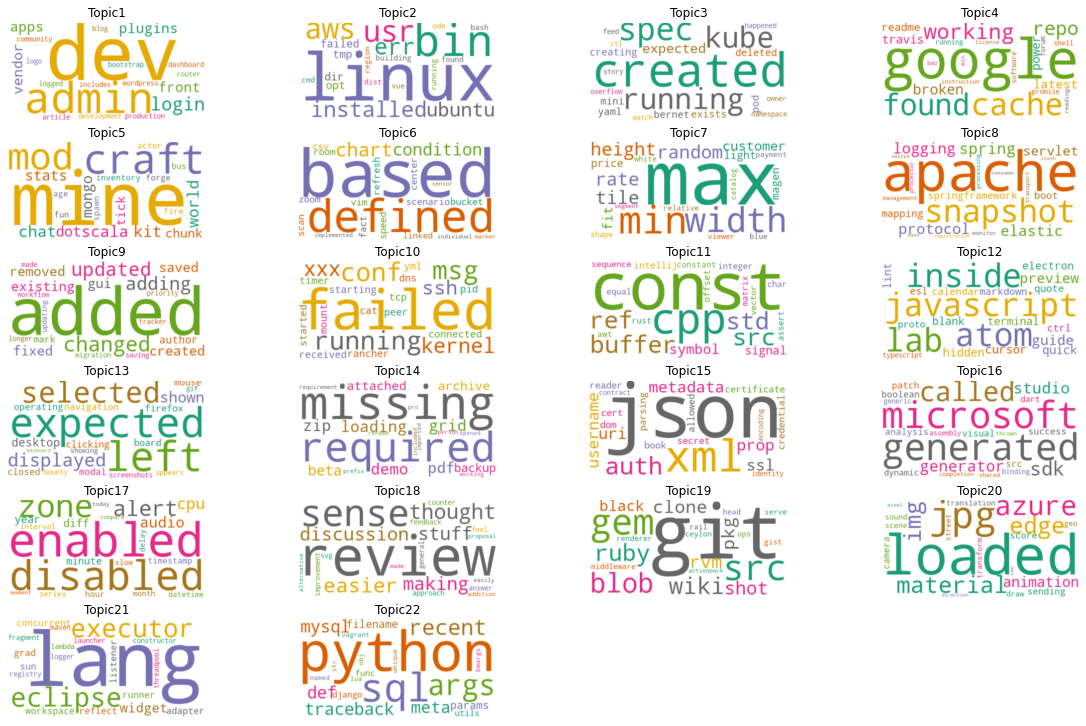

In [ ]:
# import wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(22):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(7, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) # original function has 'eta=0' argument
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
ldagensim = convertldaMalletToldaGen(ldamallet_14)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['Text'] = SO_tag_filtered_nocode.text
corpus_topic_df['Id'] = SO_tag_filtered_nocode.Id
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()

Text  ...                                                                                                                                                               Topic Terms
0  zoom piano roll zoom piano roll would useful                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ...  loaded, jpg, azure, edge, img, material, animation, sending, score, camera, translation, sound, street, scene, transform, geo, draw, direction, con, pixel              
1  buggy behavior selection screenshot http cloud git hub user content png                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ...  git, gem, src, blob, ruby, wiki, shot, clone, rvm, pkg, black, middleware, gist, head, renderer, rail, serve, ceylon, ops, actionpack                                   
2  auto update feature great job far saenz ramiro auto update feature would nice alternatively menu button check latest version manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
#predictions file
corpus_topic_df.to_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv')

In [ ]:
import numpy as np
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

Dominant Topic  Doc_Count  Total_Docs_Perc
0   1               30157      6.28           
1   2               19351      4.03           
2   3               19639      4.09           
3   4               20973      4.37           
4   5               24281      5.06           
5   6               23258      4.85           
6   7               31075      6.47           
7   8               15524      3.23           
8   9               20939      4.36           
9   10              20841      4.34           
10  11              17923      3.73           
11  12              26235      5.47           
12  13              32848      6.84           
13  14              20159      4.20           
14  15              22381      4.66           
15  16              16603      3.46           
16  17              19907      4.15           
17  18              27424      5.71           
18  19              16054      3.34           
19  20              24919      5.19           
20  21              12432      2.59           
21  22              17077      3.56

<BarContainer object of 22 artists>

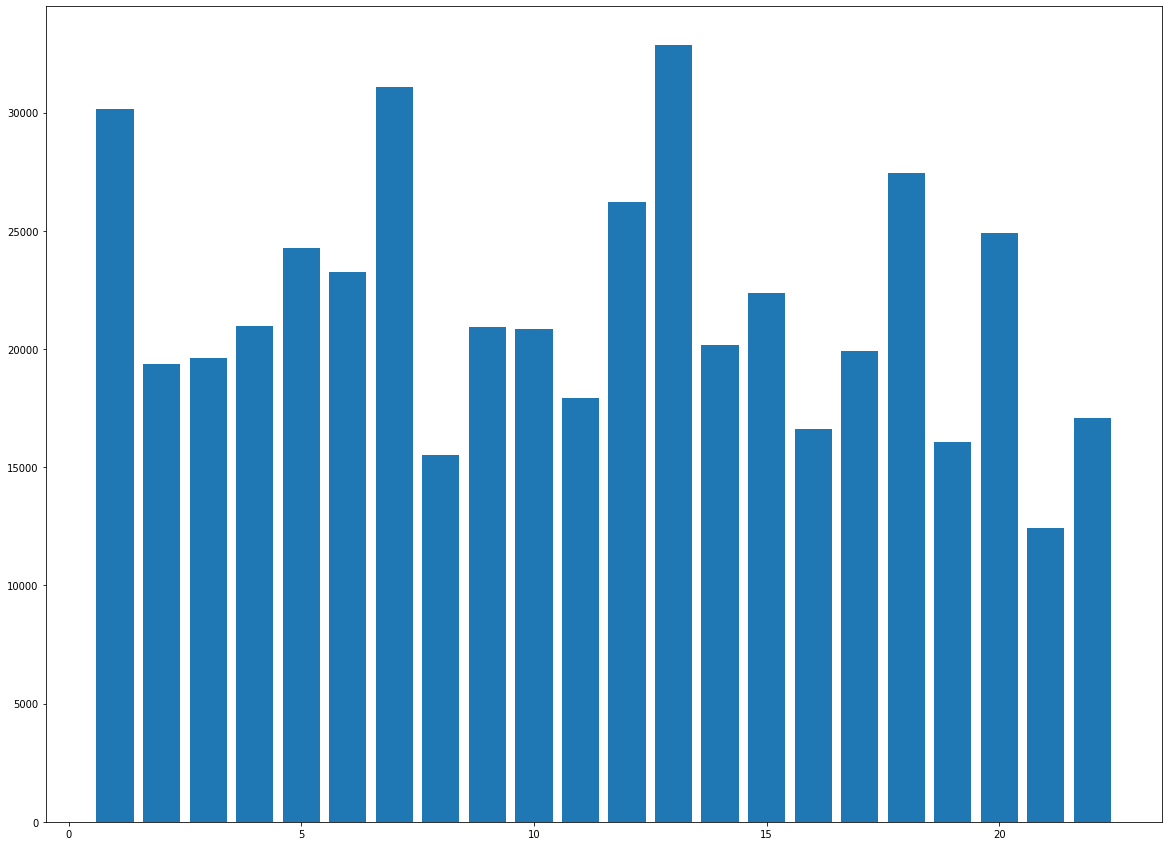

In [ ]:
plt.bar(x=dominant_topic_df['Dominant Topic'], height = dominant_topic_df['Doc_Count'])

In [ ]:
import pandas as pd
corpus_topic_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv')

In [ ]:
corpus_topic_df.tail(20)

Unnamed: 0  ...                                                                                                                                                                          Topic Terms
479980  479980      ...  python, sql, args, recent, traceback, def, mysql, meta, filename, params, django, func, utils, vagrant, obj, named, unique, str, kwargs, lua                                       
479981  479981      ...  javascript, inside, atom, lab, preview, guide, quick, cursor, hidden, terminal, lint, blank, electron, calendar, ctrl, markdown, esl, quote, proto, typescript                     
479982  479982      ...  javascript, inside, atom, lab, preview, guide, quick, cursor, hidden, terminal, lint, blank, electron, calendar, ctrl, markdown, esl, quote, proto, typescript                     
479983  479983      ...  loaded, jpg, azure, edge, img, material, animation, sending, score, camera, translation, sound, street, scene, transform, geo, draw, direction, con, pixel                         
479984  479984      ...  json, xml, auth, metadata, prop, username, ssl, uri, certificate, reader, book, credential, parsing, secret, dom, cert, allowed, identity, contract, encoding                      
479985  479985      ...  missing, required, loading, zip, grid, demo, pdf, beta, attached, archive, backup, requirement, prefix, pro, included, working, opened, person, rename, imported                   
479986  479986      ...  max, min, width, height, random, rate, tile, customer, fit, light, price, magen, payment, white, shape, viewer, blue, relative, catalog, segment                                   
479987  479987      ...  javascript, inside, atom, lab, preview, guide, quick, cursor, hidden, terminal, lint, blank, electron, calendar, ctrl, markdown, esl, quote, proto, typescript                     
479988  479988      ...  loaded, jpg, azure, edge, img, material, animation, sending, score, camera, translation, sound, street, scene, transform, geo, draw, direction, con, pixel                         
479989  479989      ...  python, sql, args, recent, traceback, def, mysql, meta, filename, params, django, func, utils, vagrant, obj, named, unique, str, kwargs, lua                                       
479990  479990      ...  added, changed, updated, adding, existing, removed, created, fixed, gui, saved, author, mark, priority, migration, workflow, updating, saving, longer, tracker, made               
479991  479991      ...  failed, running, msg, conf, kernel, xxx, ssh, starting, yml, cat, peer, rancher, dns, connected, received, tcp, started, pid, timer, mount                                         
479992  479992      ...  expected, left, selected, displayed, shown, desktop, clicking, firefox, board, navigation, mouse, operating, closed, modal, showing, gif, appears, screenshots, bounty, keyboard   
479993  479993      ...  mine, craft, mod, scala, world, chat, kit, stats, dot, mongo, chunk, tick, inventory, fun, bus, forge, age, fire, actor, spawn                                                     
479994  479994      ...  failed, running, msg, conf, kernel, xxx, ssh, starting, yml, cat, peer, rancher, dns, connected, received, tcp, started, pid, timer, mount                                         
479995  479995      ...  review, sense, thought, easier, making, discussion, stuff, approach, feedback, improvement, svg, counter, general, feel, answer, proposal, alternative, addition, easily, made     
479996  479996      ...  missing, required, loading, zip, grid, demo, pdf, beta, attached, archive, backup, requirement, prefix, pro, included, working, opened, person, rename, imported                   
479997  479997      ...  mine, craft, mod, scala, world, chat, kit, stats, dot, mongo, chunk, tick, inventory, fun, bus, forge, age, fire, actor, spawn                                                     
479998  479998      ...  lang, eclipse, executor, widget, workspace, runner, reflect, sun, grad, adapter, concurr

In [ ]:
# data_src = 'SE' # SO | SE
# data_src_urls = {
#     'SO': 'stackoverflow.com',
#     'SE': 'softwareengineering.stackexchange.com'
# }
df_lda = pd.read_csv(f"/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv")
print(f"{len(df_lda.index)} rows imported.")
df_lda = df_lda[['Id', 'Text', 'Dominant Topic', 'Contribution %', 'Topic Terms']]
# df_lda.insert(1, 'URL', f"https://{data_src_urls[data_src]}/questions/" + df_lda['Id'].astype(str) + '/')
# df_lda['IsDesign'] = ""
df_lda['Label'] = ""
df_lda.head()

480000 rows imported.


Id  ... Label
0  0   ...      
1  1   ...      
2  2   ...      
3  3   ...      
4  4   ...      

[5 rows x 6 columns]

In [ ]:
#checkpoint
df_lda.to_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv',index=False)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv')
test.head()

Id  ... Label
0  0   ... NaN  
1  1   ... NaN  
2  2   ... NaN  
3  3   ... NaN  
4  4   ... NaN  

[5 rows x 6 columns]

In [ ]:
top = df_lda.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False))).reset_index(drop=True)
top.head(30)

Id  ... Label
0   166819  ...      
1   404839  ...      
2   135909  ...      
3   376297  ...      
4   4247    ...      
5   471038  ...      
6   247692  ...      
7   115695  ...      
8   291380  ...      
9   41388   ...      
10  465100  ...      
11  347221  ...      
12  391960  ...      
13  159773  ...      
14  221806  ...      
15  58413   ...      
16  459524  ...      
17  192726  ...      
18  287122  ...      
19  75178   ...      
20  4941    ...      
21  329053  ...      
22  469364  ...      
23  118245  ...      
24  448667  ...      
25  458565  ...      
26  341149  ...      
27  130369  ...      
28  137081  ...      
29  369483  ...      

[30 rows x 6 columns]

In [ ]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480000 entries, 0 to 479999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              480000 non-null  int64  
 1   Text            480000 non-null  object 
 2   Dominant Topic  480000 non-null  int64  
 3   Contribution %  480000 non-null  float64
 4   Topic Terms     480000 non-null  object 
 5   Label           480000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 22.0+ MB


In [ ]:
top.to_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SO_top_answers.csv", index=False)

# generate samples of each topic for label naming




In [ ]:
lda = top.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False)))

In [ ]:
lda_1 = lda.reset_index(drop = True)

In [ ]:
lda_labelling = lda_1.groupby('Dominant Topic').head(10)
lda_labelling.tail(20)

Id  ... Label
450491  362025  ...      
450492  183518  ...      
450493  229902  ...      
450494  171191  ...      
450495  308630  ...      
450496  471133  ...      
450497  117358  ...      
450498  443078  ...      
450499  155797  ...      
450500  224157  ...      
462923  82197   ...      
462924  364480  ...      
462925  175983  ...      
462926  177866  ...      
462927  41961   ...      
462928  436747  ...      
462929  302808  ...      
462930  113338  ...      
462931  186520  ...      
462932  131347  ...      

[20 rows x 6 columns]

In [ ]:
lda_labelling.to_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_top_answers.csv", index=False)